In [7]:
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np        
import seaborn as sns
import matplotlib.patches as mpatches

In [9]:
# home value data
HV_file="County_MedianValuePerSqft_AllHo.csv"
home_value_df = pd.read_csv(HV_file)
home_value_df=home_value_df.sort_values("MedianValuePerSqft",ascending = False) 
home_value_df


,Year,County,MedianValuePerSqft
0,2010,Hennepin,150
1,2010,Ramsey,122
3,2010,Itasca,95
2,2010,Stearns,87
4,2010,Steele,77


In [10]:
#census data 
census_df=pd.read_csv("Resources/census_data.csv")                              
county=[census_df["County"][x].split()[0] for x in range(5)]           
census_df["County"]=county     
census_df

,State,County,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,White,Black or African American,American Indian or Alaska Native,Asian,Hawaiian or Other Pacific Islander,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree
0,27,Itasca,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,42156.0,150.0,1394.0,174.0,0.0,2443.0,10824.0,11911.0,4660.0,1960.0
1,27,Hennepin,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,869704.0,130404.0,9343.0,68523.0,515.0,60019.0,151220.0,215800.0,223883.0,111801.0
2,27,Ramsey,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,365854.0,52512.0,3481.0,55933.0,220.0,32867.0,77123.0,88169.0,76600.0,49465.0
3,27,Stearns,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,137089.0,3847.0,424.0,2840.0,40.0,9065.0,27904.0,31373.0,14321.0,6804.0
4,27,Steele,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,34107.0,935.0,35.0,306.0,0.0,2554.0,8625.0,7694.0,3824.0,1505.0


In [11]:
#County_Race_Education_df= census_df [["County", "Per Capita Income", "Median Age"]]
County_Race_Education_df= census_df [[ "County", "White", "Black or African American", "American Indian or Alaska Native",
                      "Asian", "Hawaiian or Other Pacific Islander",
                       "Less Than High School", "High School", "Some College or Associate's Degree", 
                       "Bachelor's Degree", "Graduate or Professional Degree"]]

merge_df=pd.merge(home_value_df,County_Race_Education_df,how='outer',on="County")
#merge_df.set_index('County', inplace=True)
merge_df

,Year,County,MedianValuePerSqft,White,Black or African American,American Indian or Alaska Native,Asian,Hawaiian or Other Pacific Islander,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree
0,2010,Hennepin,150,869704.0,130404.0,9343.0,68523.0,515.0,60019.0,151220.0,215800.0,223883.0,111801.0
1,2010,Ramsey,122,365854.0,52512.0,3481.0,55933.0,220.0,32867.0,77123.0,88169.0,76600.0,49465.0
2,2010,Itasca,95,42156.0,150.0,1394.0,174.0,0.0,2443.0,10824.0,11911.0,4660.0,1960.0
3,2010,Stearns,87,137089.0,3847.0,424.0,2840.0,40.0,9065.0,27904.0,31373.0,14321.0,6804.0
4,2010,Steele,77,34107.0,935.0,35.0,306.0,0.0,2554.0,8625.0,7694.0,3824.0,1505.0


In [54]:
plt.plot(County, MedianValuePerSqft, color='r', marker='0', linestyle='--', linewidth = 2.0, label='race 1'
#plt.plot(County, race 2, color='b', marker='0', linestyle='--', linewidth = 2.0, label='race 2'
#plt.title("House Value for each Race per County in year 2010")
plt.xlabel("Counties")
plt.ylabel('House value per sq ft')
plt.legend(loc='upper right')
plt.grid()

plt.show
#plt.savefig('LinePlot_Race_per_County')

SyntaxError: invalid syntax (<ipython-input-54-1675d1777bd5>, line 4)

In [19]:
vis = sns.lmplot(x='County', y='MedianValuePerSqft', data =merge_df, hue='Median Age', palette='coolwarm')

#Graph = merge_df[['Less Than High School', "Some College or Associate's Degree",""]]
#Graph.plot()

KeyError: "['Median Age'] not in index"

In [1]:
x=np.arange(len(merge_df['County']))
opacity=0.5 #Not so dark
bar_width= 0.15

#plot data
#use zorder to put bars in front of grid
plt.rcParams['figure.figsize']=(10,6)
plt.bar(x, merge_df["White"], width=bar_width, color='g', alpha=opacity)
plt.bar(x+bar_width*2, merge_df["Black or African American"], width=bar_width, color='orange', alpha=opacity)
plt.bar(x+bar_width*3, merge_df["American Indian or Alaska Native"], width=bar_width, color='blue', alpha=opacity)
plt.bar(x+bar_width*4, merge_df["Asian"], width=bar_width, color='purple', alpha=opacity)
plt.bar(x+bar_width*5, merge_df["Hawaiian or Other Pacific Islander"], width=bar_width, color='yellow', alpha=opacity)

#Adjust x until it is centered
plt.xticks(x + bar_width*2, merge_df['County'])
plt.title('House Value for each Race per County in year 2010', fontsize=30)
plt.ylabel('House value per sq ft')
plt.xlabel('Counties')

#legend
white_patch=mpatches.Patch(color='g', label='White',alpha=opacity)
black_patch=mpatches.Patch(color='orange', label='Black or African American', alpha=opacity)
American_Indian_patch=mpatches.Patch(color='blue', label='American Indian or Alaska Native', alpha=opacity)
Asian_patch=mpatches.Patch(color='purple', label='Asian', alpha=opacity)
Hawaiian_patch=mpatches.Patch(color='yellow', label='Hawaiian or Other Pacific Islander', alpha=opacity)
plt.legend(handles=[white_patch, black_patch, American_Indian_patch, Asian_patch, Hawaiian_patch], loc='upper right')
plt.grid(axis='white')

plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

In [ ]:
bar_width_1 = 0.4
bar_width_2 = 0.8

x=np.arange(len(merge_df['County']))
opacity=0.5 #Not so dark


N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = merge_df['White']
rects1 = ax.bar(ind, yvals, width, color='r', label='White', alpha=opacity)
zvals = merge_df['Black or African American']
rects2 = ax.bar(ind+width, zvals, width, color='g', label='Black or African American', alpha=opacity)
kvals = merge_df['Asian']
rects3 = ax.bar(ind+width*2, kvals, width, color='b',label='Asian', alpha=opacity)

ax.set_ylabel('House value per sq ft')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('White', 'Black or African American', 'k') )



plt.bar(x, merge_df['White'], bar_width_1, color='green', label='White', alpha=opacity)

#notice the shift
plt.bar(x+bar_width_1, merge_df['Black or African American'], bar_width, color='blue', label='Black', alpha=opacity)
plt.bar(x+bar_width_1+bar_width_2, merge_df['Asian'], bar_width, color='orange', label='phil', alpha=opacity)
plt.ylabel('House value per sq ft')
#override the xlabels with custom labels
plt.xticks(x + bar_width_1, merge_df['County'])


plt.legend()
plt.grid()
plt.tight_layout()






x=np.arange(len(merge_df['County']))




ax = plt.subplot(111)
w = 0.3
ax.bar(x-w, y,width=w,color='b',align='center')
ax.bar(x, z,width=w,color='g',align='center')
ax.bar(x+w, k,width=w,color='r',align='center')
ax.xaxis_date()
ax.autoscale(tight=True)

plt.show()



N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = merge_df['White']
rects1 = ax.bar(ind, yvals, width, color='r', label='White', alpha=opacity)
zvals = merge_df['Black or African American']
rects2 = ax.bar(ind+width, zvals, width, color='g', label='Black or African American', alpha=opacity)
kvals = merge_df['Asian']
rects3 = ax.bar(ind+width*2, kvals, width, color='b',label='Asian', alpha=opacity)

ax.set_ylabel('House value per sq ft')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('White', 'Black or African American', 'k') )



plt.bar(x, merge_df['White'], bar_width_1, color='green', label='White', alpha=opacity)

#notice the shift
plt.bar(x+bar_width_1, merge_df['Black or African American'], bar_width, color='blue', label='Black', alpha=opacity)
plt.bar(x+bar_width_1+bar_width_2, merge_df['Asian'], bar_width, color='orange', label='phil', alpha=opacity)
plt.ylabel('House value per sq ft')
#override the xlabels with custom labels
plt.xticks(x + bar_width_1, merge_df['County'])


plt.legend()
plt.grid()
plt.tight_layout()

NameError: name 'White' is not defined

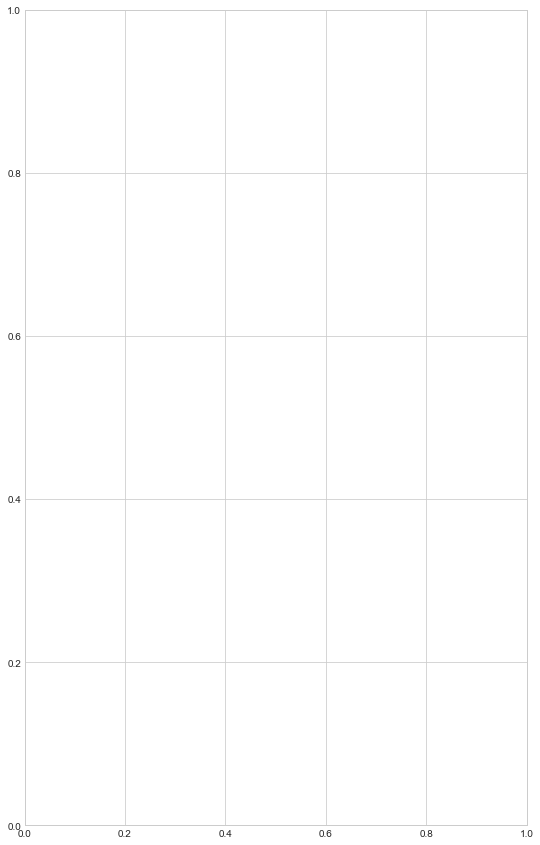

In [51]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=White,y=County,color='green',alpha = 0.5,label='White' )
sns.barplot(x=Black_or_African_American,y=MedianValuePerSqft,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=American_Indian_or_Alaska_Native,y=MedianValuePerSqft,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=Asian,y=MedianValuePerSqft,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=Hawaiian_or_Other_Pacific_Islander, y=MedianValuePerSqft,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

In [30]:
my_plot = merge_df.plot(merge_df['County'], stacked=True, kind='bar', figsize=(9, 7))
my_plot.set_xlabel("County")
my_plot.set_ylabel("MediaValuePerSqft")
my_plot.set_title('My stacked barplot')




KeyError: 'County'

In [17]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of auto types by make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis
plt.show()
fig.savefig(outfile) 


alpha=opacity

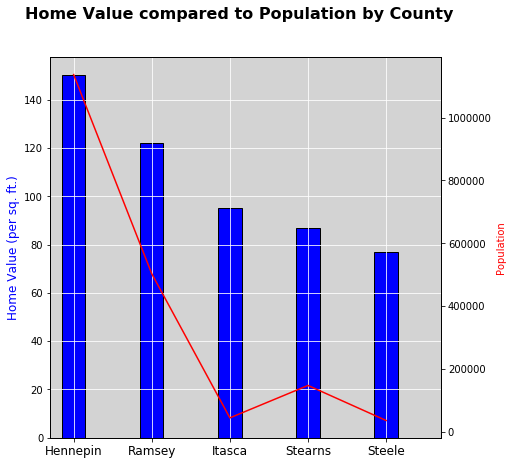

In [23]:
myplot(merge_df,"Population","Home Value compared to Population by County","County","Home Value (per sq. ft.)",
       "Population","Output/home_val_population.png")

In [28]:
poverty_data=census_df.iloc[:,1:8]                   #cut to county through poverty rate
poverty_data["Above Poverty"]=((poverty_data["Population"]-poverty_data["Poverty Count"]) /poverty_data["Population"])*100

In [27]:
merge2_df=pd.merge(home_val_df,poverty_data,how='outer',on="County")
merge2_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Above Poverty
0,2010,Hennepin,150,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,88.177704
1,2010,Ramsey,122,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,84.630689
2,2010,Itasca,95,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,88.477752
3,2010,Stearns,87,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,87.903493
4,2010,Steele,77,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,92.542680


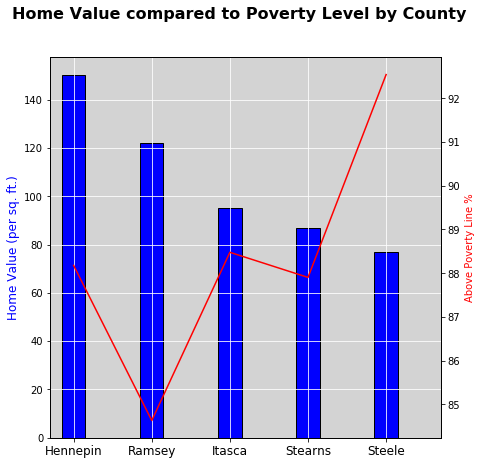

In [29]:
myplot(merge2_df,"Above Poverty","Home Value compared to Poverty Level by County","County","Home Value (per sq. ft.)",
       "Above Poverty Line %","Output/home_val_poverty.png")